Department of Physics, University of Pisa (AA 2020-2021)

### Multimessenger Physics Laboratory



## Data Analysis experience - Gravitational Waves 
#### (M. Razzano, Apr 24,2021)


### Import

In [1]:
import os 
import sys
import numpy as np #Numerical Python
import matplotlib.pyplot as plt
from astropy.io import fits
from gwosc.datasets import event_gps
from gwosc.locate import get_event_urls
from gwpy.timeseries import TimeSeries
from gwpy.segments import DataQualityFlag

### Directory


In [2]:
work_dir = os.getcwd()
main_dir =os.path.dirname(work_dir)
data_dir = os.path.join(main_dir,"data")
results_dir = os.path.join(main_dir,"results")
    

### Let's get started
After this basic setup, you are ready to start with the analysis. Enjoy!

In [13]:
ev_name = "GW170104"
ev_ifo = ("H1","L1")


dt_win=3600/4
gps = event_gps(ev_name)
ev_t0_min = gps-dt_win
ev_t0_max = gps+dt_win

class GWData():

    def __init__(self,ev_name,ev_ifo,save=False):
        dt_win=3600/2
        self.gps = event_gps(ev_name)
        ev_t0_min = self.gps-dt_win
        ev_t0_max = self.gps+dt_win
        self.data=self.Data(ev_name,ev_ifo,save)
        self.segment=self.Segment(ev_name,ev_ifo,save)

    class Data():
        def __init__(self,ev_name,ev_ifo,save):        
            for detector in ev_ifo:
                if save==True:
                    exec(f"self.{detector}=TimeSeries.fetch_open_data('{detector}',ev_t0_min,ev_t0_max,cache=True)")
                    exec(f"self.{detector}.write(os.path.join(data_dir,'{ev_name}_{detector}.txt'))")
                else:
                    exec(f"self.{detector}=Tim§eSeries.read(os.path.join(data_dir,'{ev_name}_{detector}.txt'))")

    class Segment():
        def __init__(self,ev_name,ev_ifo,save):
            for detector in ev_ifo:
                #exec(f"self.{detector}=DataQualityFlag.fetch_open_data('{detector}'+'_DATA',ev_t0_min-dt_win,ev_t0_max+dt_win)")


                if save==True:
                    exec(f"self.{detector}=DataQualityFlag.fetch_open_data('{detector}'+'_DATA',ev_t0_min-dt_win,ev_t0_max+dt_win)")
                    exec(f"self.{detector}.write(os.path.join(data_dir,'{ev_name}_{detector}_segments.json'))")
                else:
                    exec(f"self.{detector}=DataQualityFlag.read(os.path.join(data_dir,'{ev_name}_{detector}_segments.json'))")




In [14]:
gw=GWData(ev_name,ev_ifo,save=True)

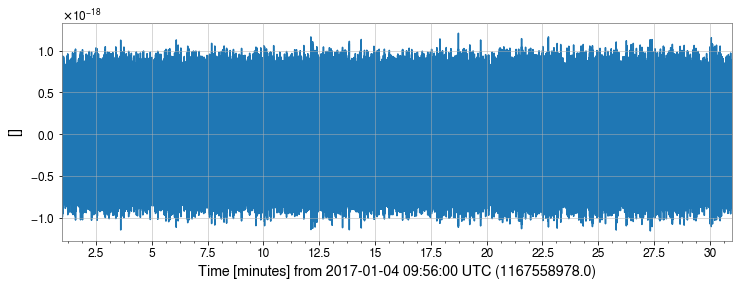

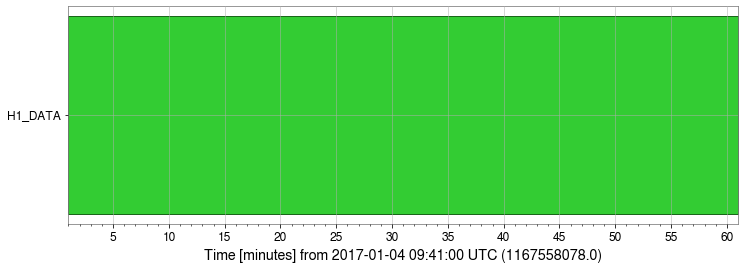

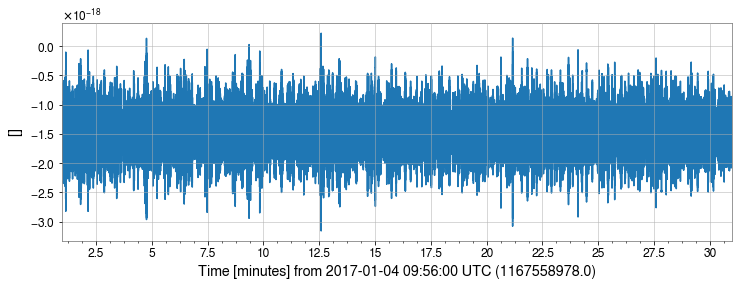

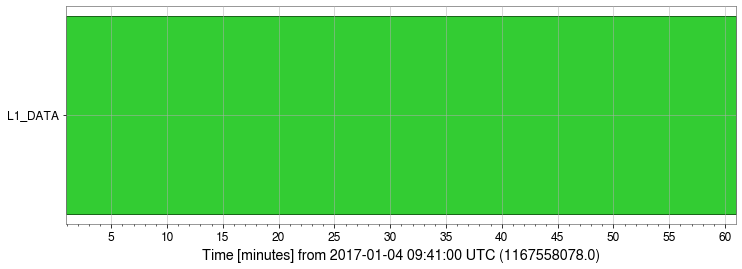

In [22]:
gw.data.H1.plot()
gw.segment.H1.plot()
gw.data.L1.plot()
gw.segment.L1.plot()
print("")